In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

p = 0.5 # probabilidade de se obter cara
Nmax = 1000 # número máximo de simulações


In [2]:
def simula(n,p, Nmax):
    vflips = [] # lista que armazena a fração de ocorrências em função do número de simulações nsim
    vp = []
    vsim = [] # numero de simulações

    for nsim in np.arange(10, Nmax, 5):
        nflips = 0    
        for i in range(1,nsim):
            nhead = 0
            while(nhead !=n):
                if(np.random.uniform() < p):
                    nhead = nhead + 1
                    nflips = nflips + 1
                else:
                    nhead = 0
                    nflips = nflips + 1

        vflips.append(nflips/nsim)
        vp.append(nsim/nflips)
        vsim.append(nsim)   
    return {'vflips':vflips,'vp':vp,'vsim':vsim}

In [3]:
ret = simula(2,p,Nmax)

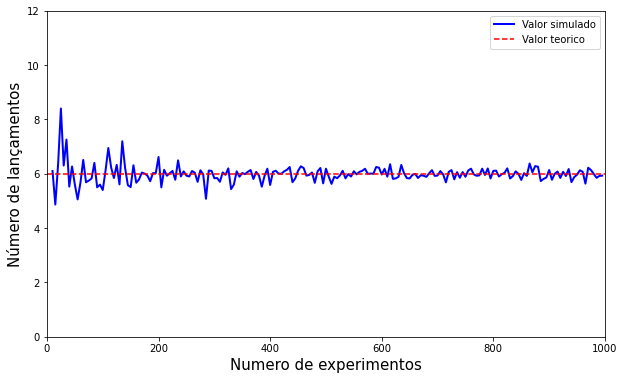

In [4]:
plt.figure(figsize = (10,6))
plt.plot(ret['vsim'],ret['vflips'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=np.mean(ret['vflips']), color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Número de lançamentos", fontsize=15)
plt.xlabel("Numero de experimentos", fontsize = 15)
#plt.suptitle("Número de lançamentos até duas caras seguidas", fontsize = 20)
plt.xlim(0.0,Nmax)
plt.ylim(0.0,12)
plt.legend()
plt.show(True)

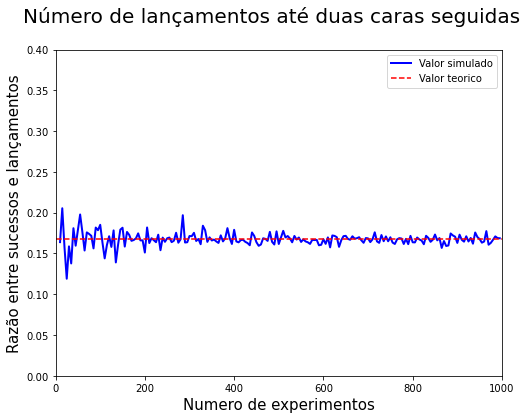

0.16741957175537878


In [5]:
plt.figure(figsize = (8,6))
plt.plot(ret['vsim'],ret['vp'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=np.mean(ret['vp']), color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Razão entre sucessos e lançamentos", fontsize=15)
plt.xlabel("Numero de experimentos", fontsize = 15)
plt.suptitle("Número de lançamentos até duas caras seguidas", fontsize = 20)
plt.xlim(0.0,Nmax)
plt.ylim(0.0,0.4)
plt.legend()
plt.show(True)
print(np.mean(ret['vp']))

In [6]:
prob = np.arange(0.1,1.1,0.1)
mean = []
for p in prob:
    mean.append(np.mean(simula(2,p,1000)['vflips']))

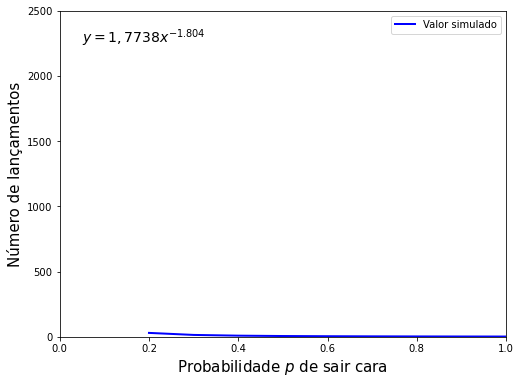

In [7]:
plt.figure(figsize = (8,6))
plt.plot(prob[1:],mean[1:], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.ylabel("Número de lançamentos", fontsize=15)
plt.xlabel("Probabilidade $p$ de sair cara", fontsize = 15)
#plt.suptitle("Número de lançamentos até duas caras seguidas", fontsize = 20)
plt.ylim(0.0,2500)
plt.xlim(0.,1)
plt.legend()

text = r"$y = 1,7738x^{-1.804}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.show(True)

In [8]:
vn = [2,3,4]
colors = {1:'blue',2:'lime',3:'black',4:'orange',5:'magenta'}
prob = np.arange(0.3,1.1,0.2)
retornos = []
for n in vn:
    for p in prob:
        ret = simula(n,p,Nmax)
        retornos.append(ret)
        print('n:',n)
        print('p:',p)
        print('esperança teórica:',(p**(-n)-1)/(1-p))
        print('media obtida:',np.mean(ret['vflips']))
        print('----------')


n: 2
p: 0.3
esperança teórica: 14.444444444444448
media obtida: 14.384907378514944
----------
n: 2
p: 0.5
esperança teórica: 6.0
media obtida: 5.997091737138826
----------
n: 2
p: 0.7
esperança teórica: 3.4693877551020407
media obtida: 3.4538025372410073
----------
n: 2
p: 0.9000000000000001
esperança teórica: 2.345679012345679
media obtida: 2.3325861734446534
----------
n: 3
p: 0.3
esperança teórica: 51.48148148148149
media obtida: 51.41923260497803
----------
n: 3
p: 0.5
esperança teórica: 14.0
media obtida: 13.85486027256291
----------
n: 3
p: 0.7
esperança teórica: 6.384839650145774
media obtida: 6.378851385303333
----------
n: 3
p: 0.9000000000000001
esperança teórica: 3.717421124828531
media obtida: 3.7080087683028293
----------
n: 4
p: 0.3
esperança teórica: 174.9382716049383
media obtida: 173.71990923517635
----------
n: 4
p: 0.5
esperança teórica: 30.0
media obtida: 29.72605750642266
----------
n: 4
p: 0.7
esperança teórica: 10.549770928779678
media obtida: 10.473117434368092


<Figure size 864x432 with 0 Axes>

Tentei realizar uma experimentação acerca da visualização em 3 dimensões, porém não obtive muito sucesso. 

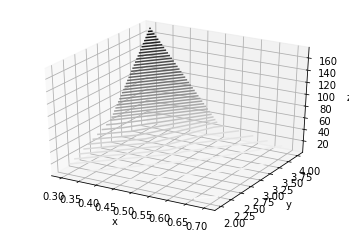

In [9]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

Z = [[14.413156206744855,5.952936241938978,3.4437708349736953],
        [51.43193113650855,13.906375353323812,6.363340694671559],
        [173.62166430585475,29.874858330468275,10.483482218532375]]

Y = [2,3,4]
X = [0.3,0.5,0.7]
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show(True)